# Udacity Data Scientist Nanodegree
## Project 1: White a Data Science Blog Post
## Stack Overflow: Where and Who?
In this project we will be looking at Stack Overflow [user survey data from 2016-2020](https://insights.stackoverflow.com/survey/) and answering the following questions:
1. In the period 2016-2020, have there been any major shifts in which countries users are from?
2. What is the gender split on Stack Overflow, and have there been any major changes between 2016-2020?
3. Looking at the 2020 data, what are the age distributions of male and female users?

### Data acquisition
Let's start by loading the required python libraries and the survery results from 2016-2020

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dict of the paths to the results files
results = {
    2016: './Stack Overflow Data/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv',
    2017: './Stack Overflow Data/developer_survey_2017/survey_results_public.csv',
    2018: './Stack Overflow Data/developer_survey_2018/survey_results_public.csv',
    2019: './Stack Overflow Data/developer_survey_2019/survey_results_public.csv',
    2020: './Stack Overflow Data/developer_survey_2020/survey_results_public.csv'
}

In [435]:
# Empty dict to store all dataframes in
dfs = {}

# Read in all the results files into a list with year as the key
for year, path in results.items():
    try:
        dfs[year] = pd.read_csv(path)
        print('Successfully read results file for year: {}'.format(year))
    except:
        print('Could not read results file for year: {}'.format(year))

Successfully read results file for year: 2016
Successfully read results file for year: 2017


/Users/guy/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Successfully read results file for year: 2018
Successfully read results file for year: 2019
Successfully read results file for year: 2020


**Note: Reading the 2018 data raises a warning due to detection of mixed types in many columns. This results in these columns being given the `object` dtype. In this case, it does not affect the analysis, but it may be important in other situations.**

### Question 1: In the period 2016-2020, have there been any major shifts in which countries users are from?
To answer this question, we'll start by taking a quick look at the data from a couple of different years.

In [436]:
dfs[2016].head(3)

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
dfs[2020].head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


We can see that the naming of the column containing the country data isn't consistent: 'Country' vs 'country'. To make it simpler to refer to the column in every dataset, we can convert all the column names to lower case.

In [438]:
# Change all the column titles to lower case to make it easy to refer to them consistently
for year in dfs.keys():
    dfs[year].columns = dfs[year].columns.str.lower()

Let's look at some of the country data from one of the years.

In [439]:
# Count the number of unique values in the country column
print("There are {} unique countries in the 2020 dataset.".format(dfs[2020]['country'].value_counts().shape[0]))

# Limit the number of countries to look at
num_countries_to_track = 6

# How much of the data is accounted for by the top countries?
print("The top {} countries make up {} of the respondents.".format(
    num_countries_to_track,
    sum(dfs[2020]['country'].value_counts(normalize=True)[:num_countries_to_track])
    ))

There are 183 unique countries in the 2020 dataset.
The top 6 countries make up 0.5110968909976277 of the respondents.


There are 183 unique countries in the column! But by looking at the normalised value counts we can see that if we just look at the top 6 countries, that covers over half of the respondents. We'll use the top six countries from the most recent survey and see how they've changed since 2016.

In [440]:
# Take the top six countries from the most recent survey, and use them as our countries to track.
countries_of_interest = list(dfs[2020]['country'].value_counts(dropna=True).keys())[:num_countries_to_track]

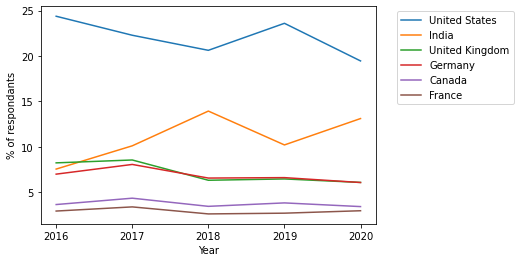

In [441]:
# Create an empty dict to store the country data over time in 
country_data_over_time = {}

# Iterate through our results sets
for year, results in dfs.items():
    # Calculate normalised counts, discounting na values
    country_counts = 100*results['country'].value_counts(dropna=True, normalize=True)

    # Iterate through our countries of interest to pull out their data
    country_data_over_time[year] = []
    for country in countries_of_interest:
        country_data_over_time[year].append(country_counts[country])  

# Seperate out the dict into x and y axes
year_values = list(country_data_over_time.keys())
country_values = list(country_data_over_time.values())

# Plot a line chart of the results
plt.xticks(year_values)
plt.xlabel('Year')
plt.ylabel('% of respondants')
plt.plot(year_values, country_values, label=countries_of_interest);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

**We can see that in the period 2016-2020:**
- **The USA is the country with the most respondents, by far.**
- **The USA has decreased from approx. 24% of users to approx. 19% of respondents.**
- **In the same time, India has increased from approx. 8% to 13% of respondents.**

There's an interesting fluctuation in the data in 2018/2019; it would be interesting to find out the cause of this!

---

### Question 2: What is the gender split on Stack Overflow, and have there been any major changes between 2016-2020?
To answer this question, we'll start by taking a quick look at the data from a couple of different years.

In [442]:
dfs[2016]['gender'].value_counts()

Male                      51388
Female                     3202
Prefer not to disclose      722
Other                       274
Name: gender, dtype: int64

In [443]:
dfs[2020]['gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: gender, dtype: int64

The way gender has been recorded has changed multiple times in the period 2016-2020, which poses challenges when comparing the data. For the sake of this analysis, we will be categorising the data into three buckets: Male/Man, Female/Woman, and Non-Binary (acknowledging that this is an umbrella term for many distinct gender identities).

We will start by cleaning the data by dropping null values, and then calculate the fraction of respondents that fall into each category.

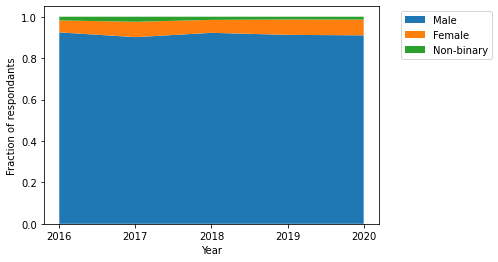

In [444]:
# Create an empty dict to store the gender data over time in 
gender_data_over_time = {}

# Iterate through our results sets
for year, results in dfs.items():
    gender_data_clean = results['gender'].dropna() # Drop null values
    num_respondants = gender_data_clean.shape[0] # Number of respondents
    
    # Get the fraction of respondants that selected only 'Male'/'Man' or 'Female'/'Woman'
    male_fraction = gender_data_clean[(gender_data_clean == 'Male') | (gender_data_clean == 'Man')].shape[0]/num_respondants
    female_fraction = gender_data_clean[(gender_data_clean == 'Female') | (gender_data_clean == 'Woman')].shape[0]/num_respondants
    
    # Remaining fraction is respondants who selected other or multiple options
    nb_fraction = 1 - (male_fraction + female_fraction)
    
    gender_data_over_time[year] = [male_fraction, female_fraction, nb_fraction]
    
# Seperate out the dict into x and y axes
year_values = list(gender_data_over_time.keys())
gender_values = list(gender_data_over_time.values())

# Transpose the data to get in the correct format for plotting with stackplot
gender_values = np.array(gender_values).T.tolist()

# Plot a stacked area chart of the results
plt.xticks(year_values)
plt.xlabel('Year')
plt.ylabel('Fraction of respondants')
plt.stackplot(year_values, gender_values, labels=['Male', 'Female', 'Non-binary']);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

We can see that the Stack Overflow surverys are predominantly answered by respondents who identify as male (90%+).

In the chart above it is difficult to determine if there are any trends. Let's replot it with the y-axis scaled to show more detail.

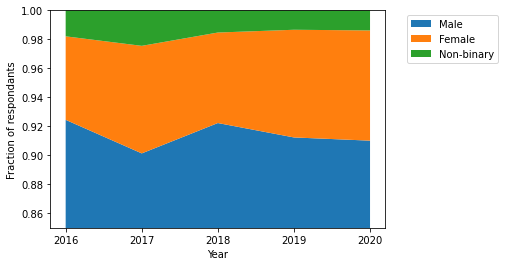

In [445]:
# Plot a stacked area chart of the results, with the y-axis scaled to help show any trends
plt.xticks(year_values)
plt.xlabel('Year')
plt.ylabel('Fraction of respondants')
plt.ylim([0.85, 1.0]) # Scale the y-axis to zoom in
plt.stackplot(year_values, gender_values, labels=['Male', 'Female', 'Non-binary']);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

**We can see that in the period 2016-2020:**
- **The way in which the survery asked users about their gender changed significantly.**
- **Survey respondents predominantly identify as male.**
- **There are no clear trends showing changes in the gender split on Stack Overflow.**

---

### Question 3: Looking at the 2020 data, what are the age distributions of male and female users?
We have seen that the majority of respondents are male, but how does this correlate with age?

Let's start by dropping rows in which both the gender and age responses are null, and taking a quick look at a summary of the age column.

In [446]:
# Clean the 2020 data to remove rows where both gender and age are null
df_2020_clean = dfs[2020].dropna(subset=['gender', 'age'], how='any')

# Let's have a quick look at the age data
df_2020_clean['age'].describe()

count    44836.000000
mean        30.821382
std          9.534412
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max        279.000000
Name: age, dtype: float64

Wow, a there's 279 year-old Stack Overflow user! But it's more likely that they've made a mistake (or lied). The oldest living person in the world (at the time of writing) is [118 years-old](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people), so let's remove any rows claiming to be older than that.

In [447]:
# Drop rows where the age is greater than the oldest living person
df_2020_clean.drop(df_2020_clean[df_2020_clean['age'] > 118].index, inplace=True)
# Check the new maximum age in the dataset
df_2020_clean['age'].max()

99.0

We've still got some pretty old Stack Overflowers, but let's give them the benefit of the doubt. Let's have a look at the median age of male and female respondents.

In [448]:
print("Median male age is {}.".format(df_2020_clean[df_2020_clean['gender'] == 'Man']['age'].median()))
print("Median female age is {}.".format(df_2020_clean[df_2020_clean['gender'] == 'Woman']['age'].median()))

Median male age is 29.0.
Median female age is 28.0.


It looks like there's a slight skew for women to be younger. Let's explore this further by making a population pyramid. To do this we need to bin the data into age brackets.

In [449]:
# Define our bins and some human-readable labels for them
age_bins = range(10, 81, 5)
age_labels = [
    '11-15',
    '16-20',
    '21-25',
    '26-30',
    '31-35',
    '36-40',
    '41-45',
    '46-50',
    '51-55',
    '56-60',
    '61-65',
    '66-70',
    '71-75',
    '76-80'
]

# Add a new column containing the age bin the respondent falls in
df_2020_clean['age bin'] = pd.cut(df_2020_clean['age'], bins=age_bins, labels=age_labels)

# Count how many falls into each bin, splitting by men and women
binned_data_man = df_2020_clean[df_2020_clean['gender'] == 'Man'].groupby('age bin').count()['gender']
binned_data_woman = df_2020_clean[df_2020_clean['gender'] == 'Woman'].groupby('age bin').count()['gender']

We know from looking at the gender split over time that Stack Overflow is male-dominated, so we need to normalise our binned data so that we can compare them meaningfully.

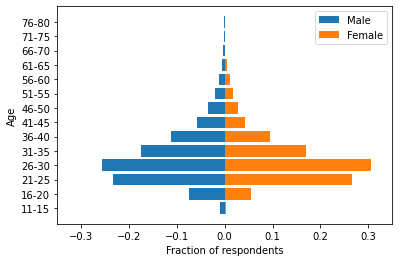

In [450]:
# Normalise the binned data. We'll also make the male data negative for plotting
binned_data_man_normalised = binned_data_man.div(-binned_data_man.sum())
binned_data_woman_normalised = binned_data_woman.div(binned_data_woman.sum())

# Plot the two data sets on a horizonal bar chart
plt.barh(age_labels, binned_data_man_normalised, label='Male');
plt.barh(age_labels, binned_data_woman_normalised, label='Female');
plt.xlim([-0.35, 0.35]);
plt.xlabel('Fraction of respondents');
plt.ylabel('Age');
plt.legend();

We can see that there appears to be a greater proportion of female respondents in the younger age brackets. To make this easier to see, let's subtract the male dataset from the female dataset and look at the differences.

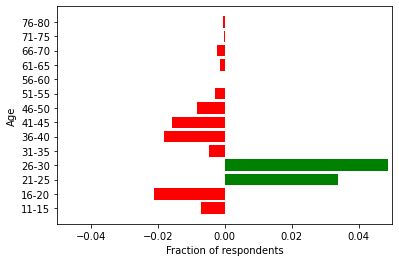

In [451]:
# Adding, as we've made the male dataset negative for plotting
binned_data_differences = binned_data_man_normalised.add(binned_data_woman_normalised)

# For formatting purposes
difference_is_positive = binned_data_differences > 0

# Plot the data on a horizonal bar chart
plt.barh(age_labels, binned_data_differences, color=difference_is_positive.map({True: 'g', False: 'r'}));
plt.xlim([-0.05, 0.05]);
plt.xlabel('Fraction of respondents');
plt.ylabel('Age');

**There are some clear differences in the age distributions of men and women on Stack Overflow:**
- **Compared to the male respondents, the age of female respondents has a narrower distribution, peaking in the 21-30 age bracket.**
- **This peak falls off rapidly either side of this age bracket.**
- **Combined with Question 2, this indicates that there are fewer female Stack Overflow users, and they are earlier in their careers.**

---

## Conclusion
In this notebook we have looked at Stack Overflow user survey data from 2016-2020 and found the following:
1. In the period 2016-2020, **there has been an increase in users from India, and a decrease in users from the USA.**
2. **Survey respondents predominantly identify as male (over 90%)**, and there are **no clear trends over time.**
3. In the 2020 data **the age distribution of female users has a narrower spread, and peaks in the 21-30 age bracket. This could indicate women earlier in their careers.**